# Importation des librairies et l'apercu des données

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
# Pour que les graphiques s'affichent bien dans le notebook
%matplotlib inline

df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(df.head())
print(df.shape)


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# I. nettoyages des données

 pour ce fait on va donc Analyse de la qualité des données (valeurs manquantes, doublons, outliers etc ...)

## 1. Vérification des valeurs manquantes

In [42]:
print("Vérification des valeurs manquantes")
print(df.isnull().sum())    

Vérification des valeurs manquantes
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### L’analyse montre qu’aucune valeur manquante explicite n’est présente dans notre dataset

## 2. Vérification des doublons

In [43]:
print("Vérification des doublons")
print(df.duplicated().sum())

Vérification des doublons
0


### l'analyse montre qu'aucun doublon explicite n'est présent dans notre dataset

## 3. Vérification des outliers

In [44]:
print("Vérification des outliers")
print(df.select_dtypes(include=["int64", "float64"]).describe())

Vérification des outliers
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [45]:
print(df['SeniorCitizen'].dtype)



int64


### L’analyse des variables numériques principales (SeniorCitizen, tenure, MonthlyCharges) montre que les valeurs observées se situent toutes dans des bornes cohérentes avec le contexte métier :

La variable SeniorCitizen est binaire (0 ou 1), elle ne peut donc pas contenir d’outliers.

La variable tenure (ancienneté en mois) varie entre 0 et 72, ce qui correspond à des clients récents jusqu’à six années de fidélité, une valeur réaliste compte tenu du jeu de données.

La variable MonthlyCharges (facture mensuelle) varie entre 18.25 et 118.75, ce qui reflète les différentes combinaisons de services souscrits par les clients. La valeur maximale est logique pour un client ayant souscrit à l’ensemble des services proposés.

En conséquence, aucun outlier aberrant n’a été détecté dans ces variables, et l’intégralité des données peut être conservée pour la suite du processus de modélisation.


# II. Visualisation descriptives avec Seaborn et Matplotlib

## 1. Analyse de la distribution du Churn (variable cible)

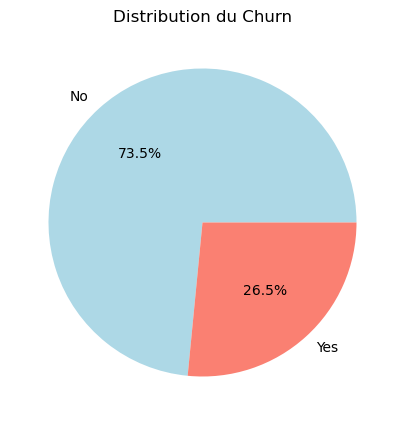

Distribution du Churn:
Churn
No     73.5
Yes    26.5
Name: proportion, dtype: float64 %


In [46]:

plt.figure(figsize=(8, 5))
churn_dist = df['Churn'].value_counts()
plt.pie(churn_dist, labels=churn_dist.index, autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Distribution du Churn')
plt.show()

print("Distribution du Churn:")
print(df['Churn'].value_counts(normalize=True).round(3) * 100, "%")

La majorité des clients ne résilient pas leur contrat (près de 3 sur 4).

Seule une minorité, mais tout de même significative (environ 1 sur 4), choisit de résilier.

## 2. Analyse des variables numériques

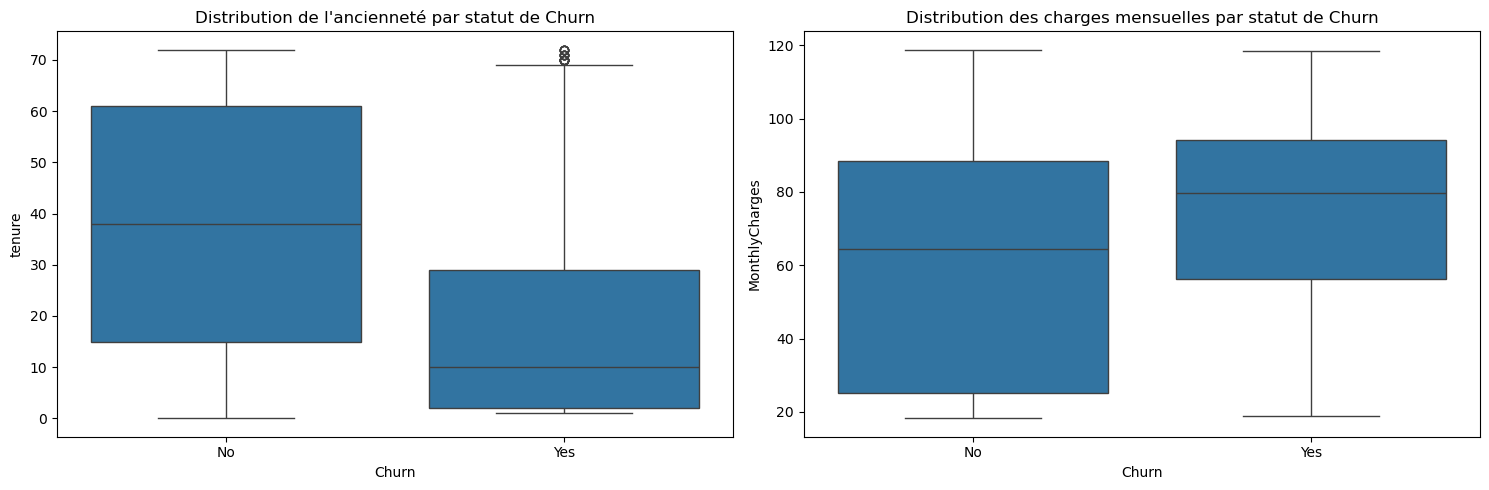

In [47]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution de l'ancienneté
sns.boxplot(data=df, y='tenure', x='Churn', ax=axes[0])
axes[0].set_title('Distribution de l\'ancienneté par statut de Churn')

# Distribution des charges mensuelles
sns.boxplot(data=df, y='MonthlyCharges', x='Churn', ax=axes[1])
axes[1].set_title('Distribution des charges mensuelles par statut de Churn')

plt.tight_layout()
plt.show()

#### Distribution de l'ancienneté (tenure) par statut de Churn
Clients fidèles ("No") : ancienneté médiane élevée (~38 mois), distribution large, forte variabilité → beaucoup de clients restent longtemps.

Clients churnés ("Yes") : ancienneté médiane faible (~10 mois), distribution concentrée vers le bas, faible variabilité → la plupart quittent tôt dans leur relation avec l’entreprise.

#### Distribution des charges mensuelles par statut de Churn
Clients fidèles ("No") : charges mensuelles médianes plus faibles (~65$), distribution équilibrée, peu de valeurs extrêmes.

Clients churnés ("Yes") : charges mensuelles médianes plus élevées (~80$), distribution dispersée vers le haut, présence de nombreuses valeurs extrêmes.

## 3. Analyse des services et leur impact sur le Churn

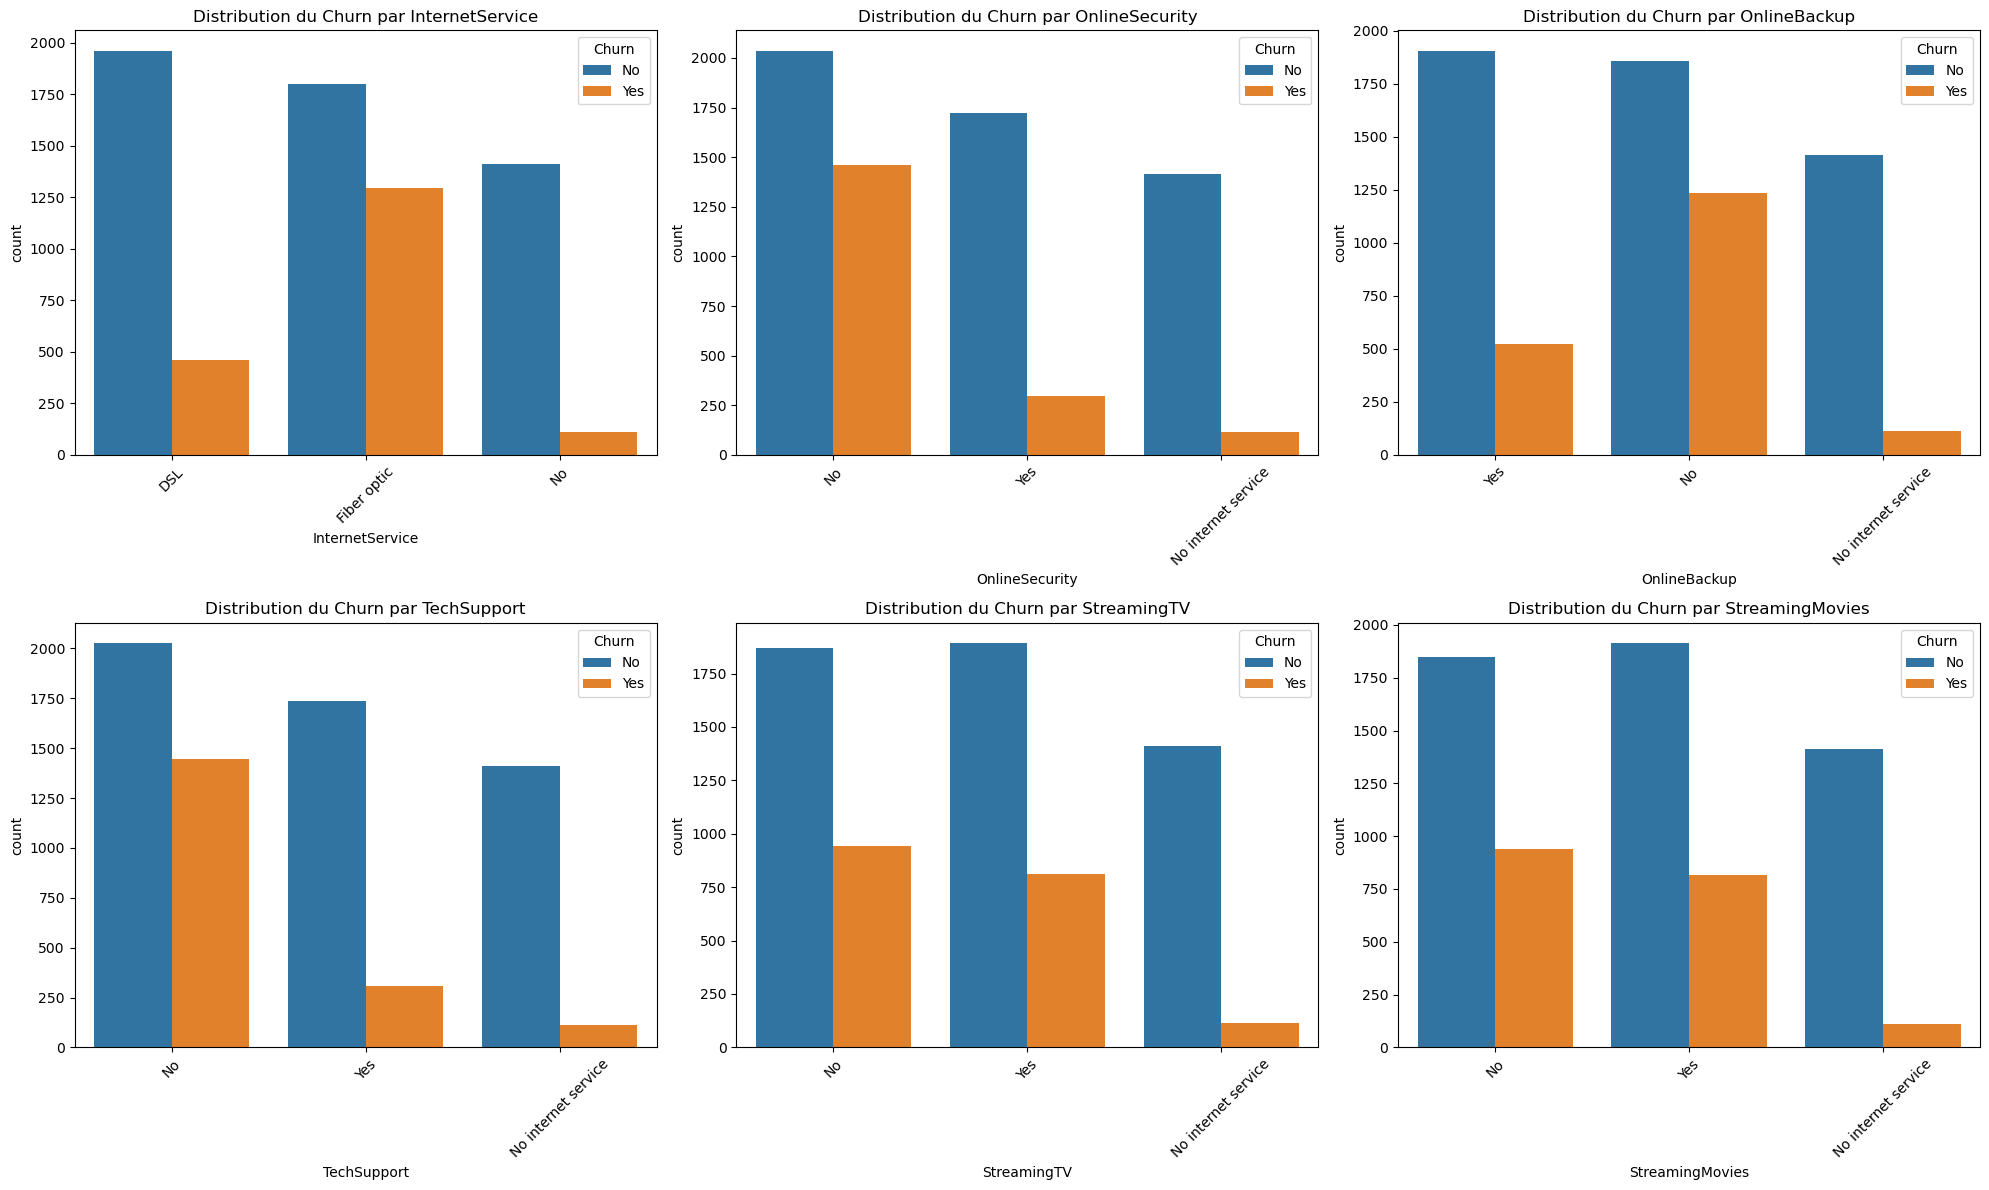

In [48]:

services = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, service in enumerate(services):
    sns.countplot(data=df, x=service, hue='Churn', ax=axes[idx])
    axes[idx].set_title(f'Distribution du Churn par {service}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Interprétation :

1. **Service Internet** (en haut à gauche) :
- Il y a 3 types de service : DSL, Fiber optic (fibre optique), et No service (pas de service)
- La fibre optique a beaucoup de clients qui partent (barres orange)
- Le DSL garde mieux ses clients (plus de barres bleues)
- Très peu de clients n'ont pas de service internet

2. **Sécurité en ligne** (en haut au milieu) :
- Beaucoup de clients n'ont pas de sécurité ("No")
- Parmi ceux qui n'ont pas de sécurité, beaucoup partent
- Avoir la sécurité en ligne semble aider à garder les clients

3. **Sauvegarde en ligne** (en haut à droite) :
- Même tendance que la sécurité
- Les clients avec sauvegarde restent plus souvent
- Ne pas avoir de sauvegarde augmente le risque de départ

4. **Support technique** (en bas à gauche) :
- Les clients sans support technique partent plus souvent
- Avoir un support technique aide beaucoup à garder les clients
- C'est un service important pour la fidélisation

5. **TV en streaming** (en bas au milieu) :
- La distribution est plus équilibrée
- Même sans TV en streaming, certains clients restent
- Avoir ce service n'est pas forcément décisif

6. **Films en streaming** (en bas à droite) :
- Très similaire à la TV en streaming
- Ce n'est pas le service le plus important pour garder les clients
- Les clients peuvent partir même avec ce service

**Ce que j'en comprends simplement** :
1. La fibre optique attire beaucoup de clients mais ils partent aussi plus facilement
2. Les services de sécurité et de support technique sont très importants pour garder les clients
3. Les services de streaming (TV et films) sont moins importants pour la fidélisation
4. Plus un client a de services, plus il a tendance à rester

**axe d'amélioration** :
1. Proposer la sécurité en ligne et le support technique en priorité
2. Faire attention aux clients qui ont la fibre optique
3. Encourager les clients à prendre plusieurs services
4. Bien expliquer les avantages de chaque service aux nouveaux clients



## 4. Analyse des variables démographiques

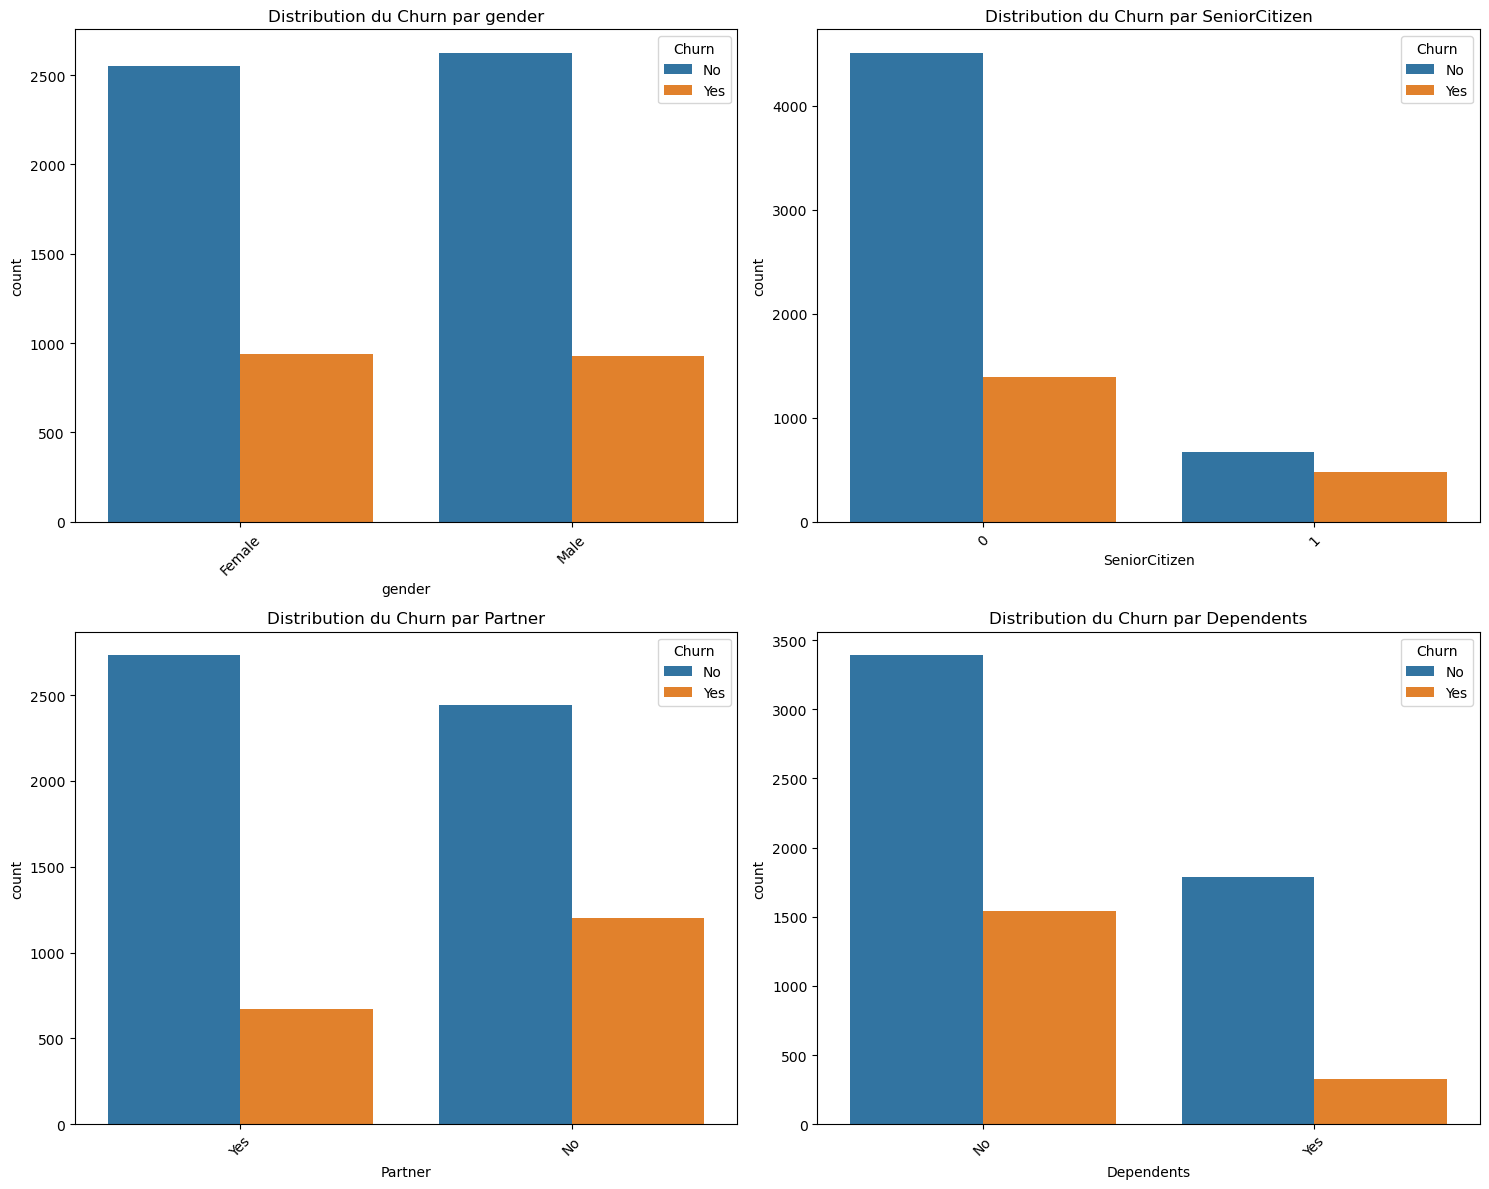

In [49]:

demographic_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, var in enumerate(demographic_vars):
    sns.countplot(data=df, x=var, hue='Churn', ax=axes[idx])
    axes[idx].set_title(f'Distribution du Churn par {var}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Interpretation:

1. **Distribution du Churn par genre** (en haut à gauche) :
- La répartition homme/femme est assez équilibrée
- Le taux de churn est très similaire entre les hommes et les femmes (environ 26-27%)
- Le genre n'apparaît pas comme un facteur déterminant du churn
- Conclusion : Le genre n'influence pas significativement le comportement de churn

2. **Distribution du Churn par SeniorCitizen** (en haut à droite) :
- La majorité des clients ne sont pas des seniors (0)
- Les seniors (1) représentent environ 16% de la base clients
- Les seniors ont un taux de churn plus élevé (environ 42%)
- Les non-seniors ont un taux de churn plus faible (environ 24%)
- Conclusion : Les seniors sont plus susceptibles de quitter le service

3. **Distribution du Churn par Partner** (en bas à gauche) :
- "Yes" : clients avec partenaire
- "No" : clients sans partenaire
- Les clients sans partenaire ont un taux de churn plus élevé (environ 32%)
- Les clients avec partenaire ont un taux de churn plus faible (environ 20%)
- Conclusion : Avoir un partenaire est associé à une meilleure rétention

4. **Distribution du Churn par Dependents** (en bas à droite) :
- "Yes" : clients avec personnes à charge
- "No" : clients sans personnes à charge
- Les clients sans personnes à charge ont un taux de churn nettement plus élevé (environ 31%)
- Les clients avec personnes à charge ont un taux de churn plus faible (environ 16%)
- Conclusion : Avoir des personnes à charge est un facteur de stabilité

**Interprétation concise** :
1. Les facteurs familiaux (partenaire, personnes à charge) sont de bons indicateurs de stabilité
2. L'âge (senior/non-senior) est un facteur important de churn
3. Le genre n'a pas d'impact significatif sur le churn

**axe d'amélioration** :
1. Porter une attention particulière aux clients seniors :
   - Développer des offres spéciales pour les seniors
   - Proposer un support client adapté
   - Simplifier les services pour cette population

2. Pour les clients célibataires sans personnes à charge :
   - Créer des programmes de fidélisation spécifiques
   - Proposer des avantages particuliers
   - Renforcer le suivi client

3. Pour les familles :
   - Développer des offres familiales attractives
   - Proposer des services additionnels adaptés aux familles
   - Maintenir des prix compétitifs pour les forfaits familiaux

4. Approche générale :
   - Ne pas différencier les stratégies marketing selon le genre
   - Se concentrer sur les segments à risque (seniors célibataires)
   - Valoriser les offres familiales

## 5. Analyse du contrat et du paiement

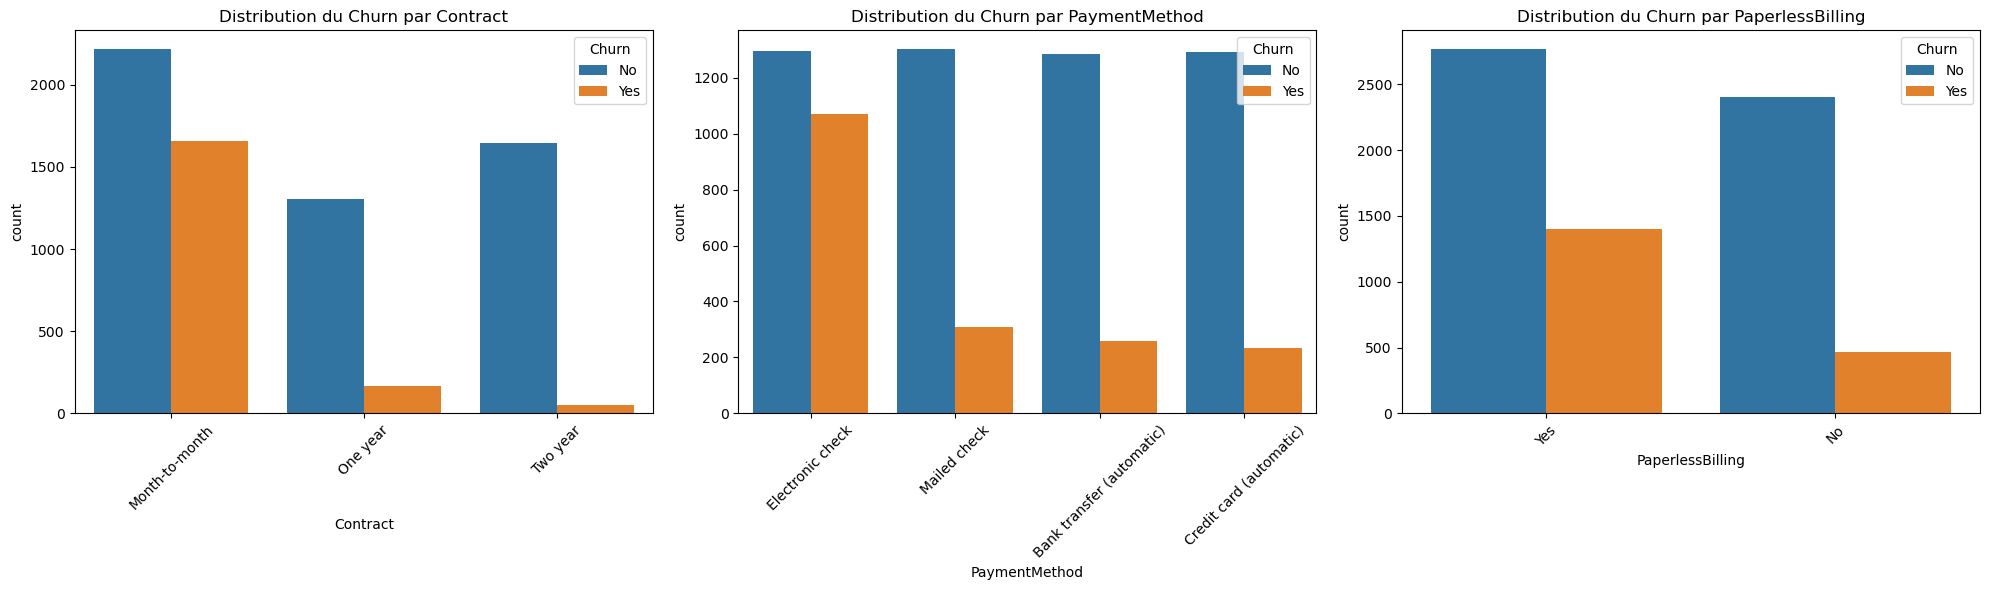

In [50]:

contract_vars = ['Contract', 'PaymentMethod', 'PaperlessBilling']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes = axes.ravel()

for idx, var in enumerate(contract_vars):
    sns.countplot(data=df, x=var, hue='Churn', ax=axes[idx])
    axes[idx].set_title(f'Distribution du Churn par {var}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Interpretation :

1. **Distribution du Churn par type de Contrat**  :
- **Month-to-month (Mensuel)**
  - Le plus grand nombre de clients
  - Taux de churn très élevé (environ 43% des clients mensuels partent)
  - Représente la situation la plus risquée pour l'entreprise

- **One year (Un an)**
  - Nombre modéré de clients
  - Taux de churn beaucoup plus faible (environ 11%)
  - Meilleure rétention que les contrats mensuels

- **Two year (Deux ans)**
  - Nombre similaire aux contrats d'un an
  - Taux de churn le plus faible (environ 3%)
  - Meilleure fidélisation des clients

2. **Distribution du Churn par méthode de paiement** (graphique du milieu) :
- **Electronic check (Chèque électronique)**
  - Taux de churn le plus élevé (environ 45%)
  - Méthode de paiement la plus risquée

- **Mailed check (Chèque postal)**
  - Taux de churn modéré (environ 20%)

- **Bank transfer (Virement bancaire)** et **Credit card (Carte de crédit)**
  - Taux de churn les plus faibles (environ 16-17%)
  - Méthodes de paiement les plus sûres pour la rétention

3. **Distribution du Churn par PaperlessBilling**  :
- **Yes (Facture électronique)**
  - Plus grand nombre de clients
  - Taux de churn plus élevé (environ 34%)

- **No (Facture papier)**
  - Moins de clients
  - Taux de churn plus faible (environ 16%)

**Interprétation concise** :
1. Le type de contrat est un indicateur très fort du risque de churn :
   - Les contrats mensuels sont les plus risqués
   - Les contrats long terme (1-2 ans) sont les plus sûrs

2. La méthode de paiement influence significativement le churn :
   - Les chèques électroniques sont associés à un risque plus élevé
   - Les paiements automatiques (virement, carte) sont plus sûrs

3. La facturation électronique est associée à un risque plus élevé de churn

**axe d'amélioration** :
1. **Contrats** :
   - Encourager les clients à opter pour des contrats plus longs
   - Offrir des avantages spéciaux pour les engagements long terme
   - Mettre en place des programmes de fidélité pour les clients mensuels

2. **Paiements** :
   - Promouvoir les paiements automatiques (virement, carte)
   - Offrir des incitations pour passer du chèque électronique aux autres méthodes
   - Analyser pourquoi les clients utilisant les chèques électroniques partent plus

3. **Facturation** :
   - Examiner pourquoi la facturation électronique est associée à plus de churn
   - Améliorer l'expérience de la facturation électronique
   - Considérer des avantages spécifiques pour les clients en facturation électronique

